In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD,Adam

In [2]:
file_path = r"C:\Users\MinGi\Desktop\year3-sem1\인공지능개론\dataset\abalone.csv"
df = pd.read_csv(file_path)

print(df.head())

   id Sex  Length  Diameter  Height  Whole_weight  Shucked_weight  \
0   0   M   0.455     0.365   0.095        0.5140          0.2245   
1   1   M   0.350     0.265   0.090        0.2255          0.0995   
2   2   F   0.530     0.420   0.135        0.6770          0.2565   
3   3   M   0.440     0.365   0.125        0.5160          0.2155   
4   4   I   0.330     0.255   0.080        0.2050          0.0895   

   Viscera_weight  Shell_weight  Rings  
0          0.1010         0.150     15  
1          0.0485         0.070      7  
2          0.1415         0.210      9  
3          0.1140         0.155     10  
4          0.0395         0.055      7  


In [3]:
df.isnull().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [4]:
for c in df.columns:
    print(df[c].value_counts())

id
0       1
2775    1
2777    1
2778    1
2779    1
       ..
1397    1
1398    1
1399    1
1400    1
4176    1
Name: count, Length: 4177, dtype: int64
Sex
M    1528
I    1342
F    1307
Name: count, dtype: int64
Length
0.625    94
0.550    94
0.575    93
0.580    92
0.600    87
         ..
0.075     1
0.815     1
0.110     1
0.150     1
0.800     1
Name: count, Length: 134, dtype: int64
Diameter
0.450    139
0.475    120
0.400    111
0.500    110
0.470    100
        ... 
0.610      1
0.650      1
0.620      1
0.095      1
0.615      1
Name: count, Length: 111, dtype: int64
Height
0.150    267
0.140    220
0.155    217
0.175    211
0.160    205
0.125    202
0.165    193
0.135    189
0.145    182
0.130    169
0.120    169
0.170    160
0.100    145
0.110    135
0.115    133
0.180    131
0.090    124
0.105    114
0.185    103
0.190    103
0.095     91
0.195     78
0.080     76
0.085     74
0.200     68
0.075     61
0.070     47
0.205     45
0.065     39
0.215     31
0.060     26
0.055   

In [5]:
df['Sex'] = LabelEncoder().fit_transform(df['Sex'])

x = df.drop('Rings', axis=1)
y = df['Rings']

scaler = StandardScaler()
x = scaler.fit_transform(x)

In [6]:
Y = pd.get_dummies(y).values

x_train, x_test, y_train, y_test = train_test_split(x, Y,test_size=0.25,random_state=0)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(3132, 9) (3132, 28)
(1045, 9) (1045, 28)


In [7]:
model = Sequential()

model.add(Dense(20,input_shape=(9,),activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(10,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='rmsprop', loss='mse', metrics=['mse'])

model.summary()

C:\Users\MinGi\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━┳━━━━━━━━━━━┳━━━━━━┓
┃              ┃ Output    ┃ Par… ┃
┃ Layer (type) ┃ Shape     ┃    # ┃
┡━━━━━━━━━━━━━━╇━━━━━━━━━━━╇━━━━━━┩
│ dense        │ (None,    │  200 │
│ (Dense)      │ 20)       │      │
├──────────────┼───────────┼──────┤
│ dense_1      │ (None,    │  315 │
│ (Dense)      │ 15)       │      │
├──────────────┼───────────┼──────┤
│ dense_2      │ (None,    │  160 │
│ (Dense)      │ 10)       │      │
├──────────────┼───────────┼──────┤
│ dense_3      │ (None, 1) │   11 │
│ (Dense)      │           │      │
└──────────────┴───────────┴──────┘

 Total params: 686 (2.68 KB)

 Trainable params: 686 (2.68 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
N_EPOCHS = 9
model_history = model.fit(x=x_train, y=y_train, epochs=N_EPOCHS, batch_size=32,validation_split=0.1) # train의 10%를 validation으로 설정. 검증에 사용
y_pred = model.predict(x_test)

y_test_class = np.argmax(y_test,axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

Epoch 1/9
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0344 - mse: 0.0344 - val_loss: 0.0345 - val_mse: 0.0345
Epoch 2/9
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0344 - mse: 0.0344 - val_loss: 0.0344 - val_mse: 0.0344
Epoch 3/9
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0344 - mse: 0.0344 - val_loss: 0.0344 - val_mse: 0.0344
Epoch 4/9
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0344 - mse: 0.0344 - val_loss: 0.0344 - val_mse: 0.0344
Epoch 5/9
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0344 - mse: 0.0344 - val_loss: 0.0344 - val_mse: 0.0344
Epoch 6/9
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0344 - mse: 0.0344 - val_loss: 0.0344 - val_mse: 0.0344
Epoch 7/9
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0344 - mse: 0.0344 - val_loss: 0.0344 - val_mse: 0.0344
Epoch 8/9
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0344 - mse: 0.0344 - val_loss: 0.0344 - val_mse: 0.0344
Epoch 9/9
89/89 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0344 - mse: 0.0344 - 

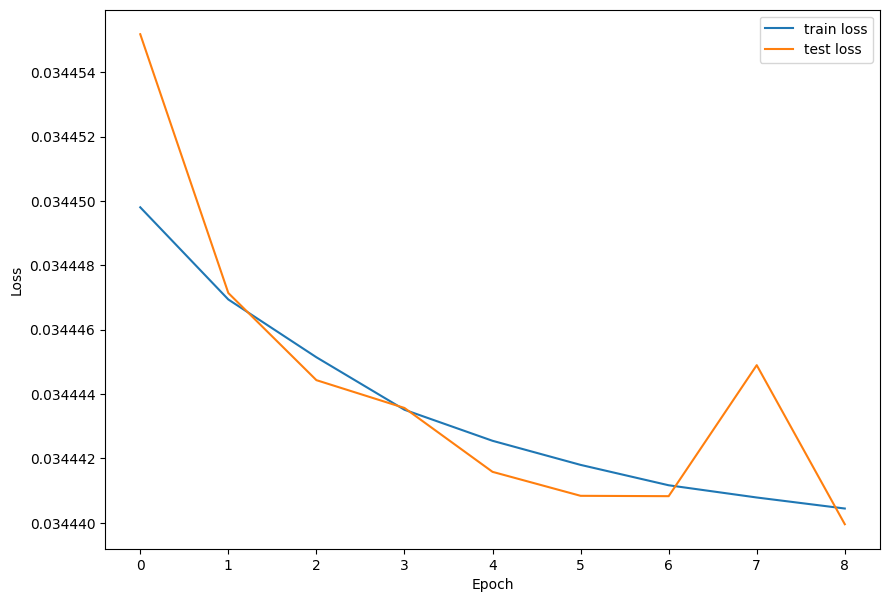

In [10]:
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), model_history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), model_history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [11]:
model.evaluate(x_test, y_test)

33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.0344 - mse: 0.0344 


[0.03444042429327965, 0.03444042429327965]